In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Model, Sequential
from keras.layers import GRU, Dense, Dropout, TimeDistributed, Input, Concatenate, RepeatVector, Reshape
from keras.optimizers import Adam

from Utils import *

2024-07-09 21:53:34.397470: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 21:53:34.473406: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-09 21:53:34.474906: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-09 21:53:35.787903: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Import Data

In [2]:
# import the .pkl file
df = pd.read_pickle("esc10.pkl")
print('Shape of the dataframe:', df.shape)
print('Shape of a mel spectrogram:', df.mel_spectrogram[0].shape)

Shape of the dataframe: (1600, 4)
Shape of a mel spectrogram: (128, 156)


#### Define AE model

In [3]:
def init_autoencoder():
    Nm = 128
    time_steps = 156
    # Encoder
    model = Sequential()
    model.add(GRU(256, input_shape=(time_steps, Nm), return_sequences=True))
    model.add(GRU(128))
    model.add(Dense(128, activation='tanh', name='enc'))
    # Decoder
    model.add(RepeatVector(time_steps))
    model.add(GRU(128, return_sequences=True))
    model.add(GRU(256, return_sequences=True))
    model.add(TimeDistributed(Dense(Nm, activation='tanh')))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

init_autoencoder().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 156, 256)          296448    
                                                                 
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 enc (Dense)                 (None, 128)               16512     
                                                                 
 repeat_vector (RepeatVecto  (None, 156, 128)          0         
 r)                                                              
                                                                 
 gru_2 (GRU)                 (None, 156, 128)          99072     
                                                                 
 gru_3 (GRU)                 (None, 156, 256)          296448    
                                                        

#### Define classification model

In [4]:
def init_model(encoder):
    model = Sequential()
    model.add(encoder)
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

#### 5-folds Cross-Validation training and results

Fold 1/5

Training AE model...

Epoch 1/10
40/40 [==============================] - 42s 861ms/step - loss: 0.2033 - val_loss: 0.1421
Epoch 2/10
40/40 [==============================] - 33s 815ms/step - loss: 0.1481 - val_loss: 0.1202
Epoch 3/10
40/40 [==============================] - 33s 814ms/step - loss: 0.1291 - val_loss: 0.1061
Epoch 4/10
40/40 [==============================] - 33s 816ms/step - loss: 0.1183 - val_loss: 0.1274
Epoch 5/10
40/40 [==============================] - 33s 816ms/step - loss: 0.1183 - val_loss: 0.0977
Epoch 6/10
40/40 [==============================] - 33s 814ms/step - loss: 0.1094 - val_loss: 0.0997
Epoch 7/10
40/40 [==============================] - 33s 818ms/step - loss: 0.1067 - val_loss: 0.0997
Epoch 8/10
40/40 [==============================] - 33s 821ms/step - loss: 0.1031 - val_loss: 0.1029
Epoch 9/10
40/40 [==============================] - 33s 819ms/step - loss: 0.1035 - val_loss: 0.0902
Epoch 10/10
40/40 [==============================] - 33s 81

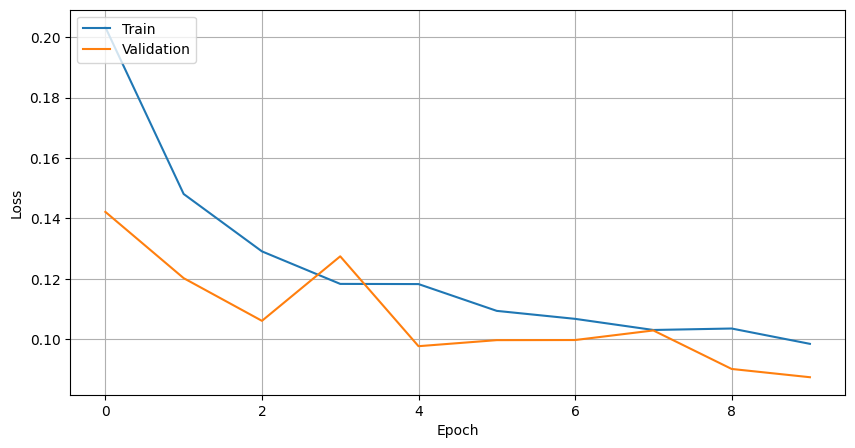

Classification training results:


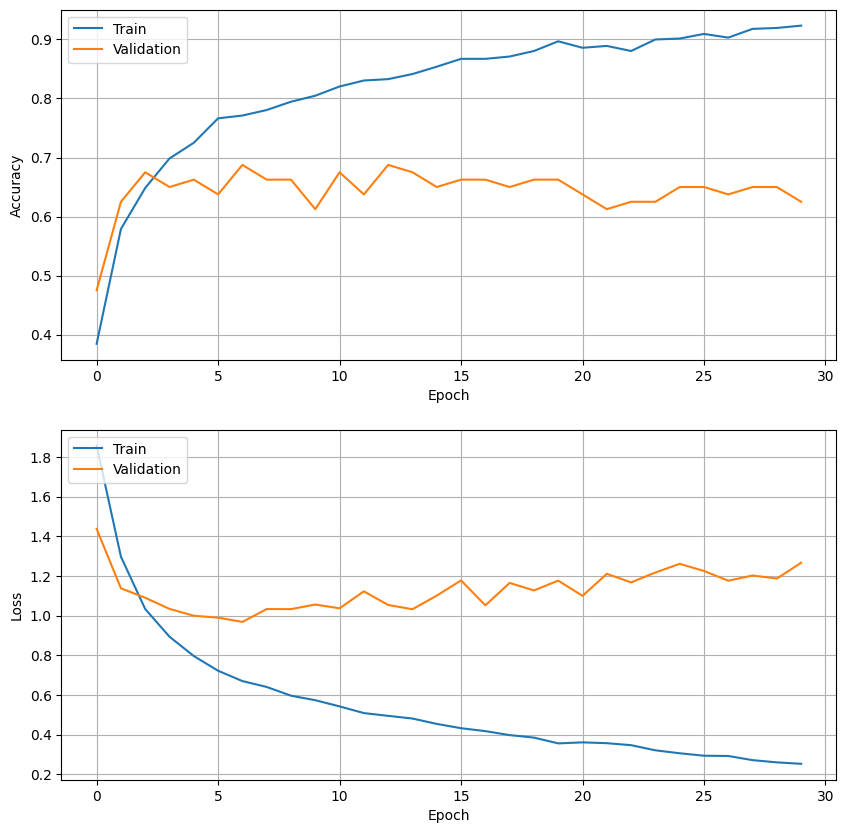

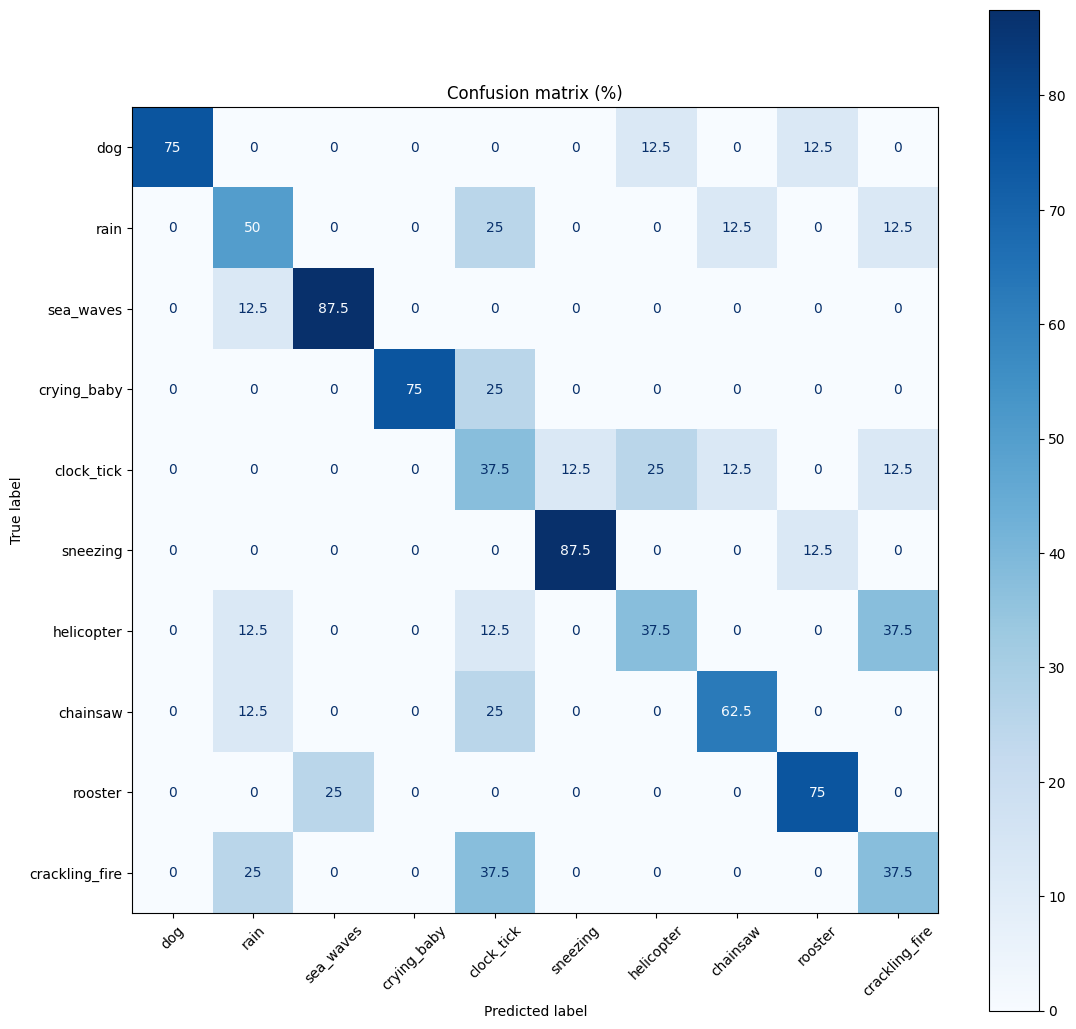

Fold 2/5

Training AE model...

Epoch 1/10
40/40 [==============================] - 43s 862ms/step - loss: 0.1989 - val_loss: 0.1501
Epoch 2/10
40/40 [==============================] - 32s 790ms/step - loss: 0.1457 - val_loss: 0.1282
Epoch 3/10
40/40 [==============================] - 32s 793ms/step - loss: 0.1300 - val_loss: 0.1249
Epoch 4/10
40/40 [==============================] - 31s 788ms/step - loss: 0.1199 - val_loss: 0.1069
Epoch 5/10
40/40 [==============================] - 32s 790ms/step - loss: 0.1101 - val_loss: 0.1018
Epoch 6/10
40/40 [==============================] - 32s 792ms/step - loss: 0.1065 - val_loss: 0.1097
Epoch 7/10
40/40 [==============================] - 32s 790ms/step - loss: 0.1058 - val_loss: 0.0975
Epoch 8/10
40/40 [==============================] - 32s 791ms/step - loss: 0.1061 - val_loss: 0.1011
Epoch 9/10
40/40 [==============================] - 32s 790ms/step - loss: 0.0996 - val_loss: 0.0941
Epoch 10/10
40/40 [==============================] - 32s 79

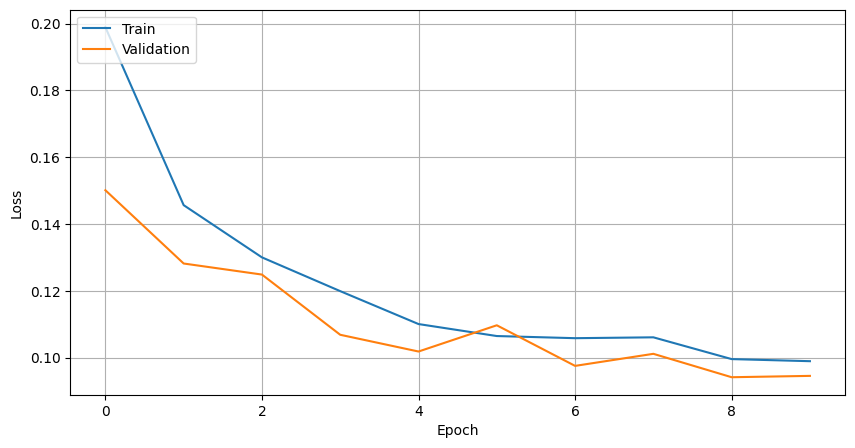

Classification training results:


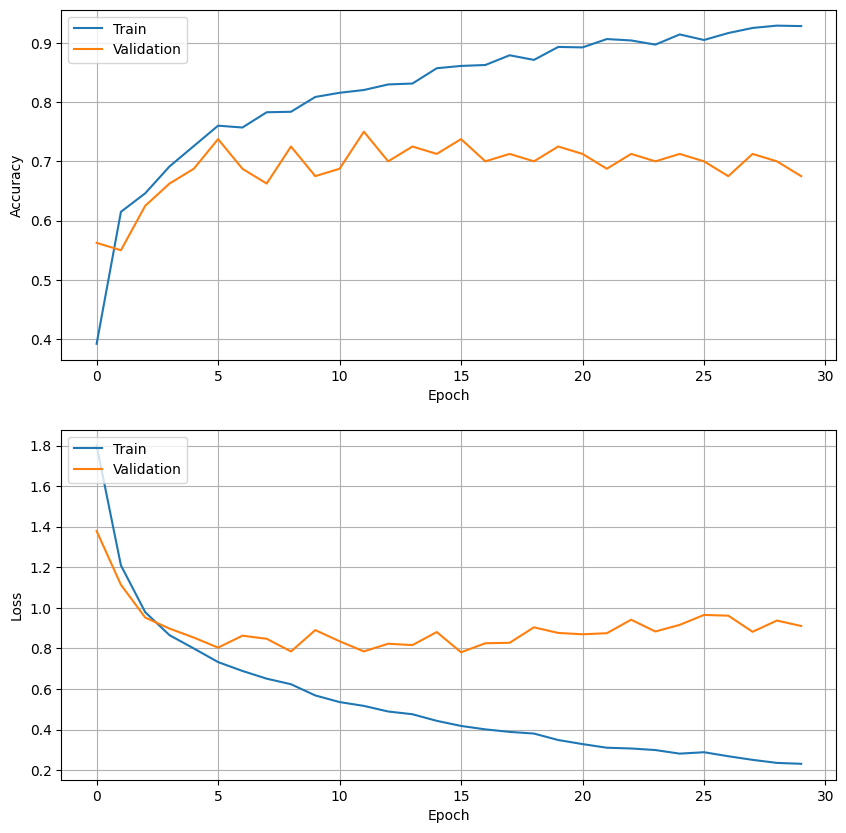

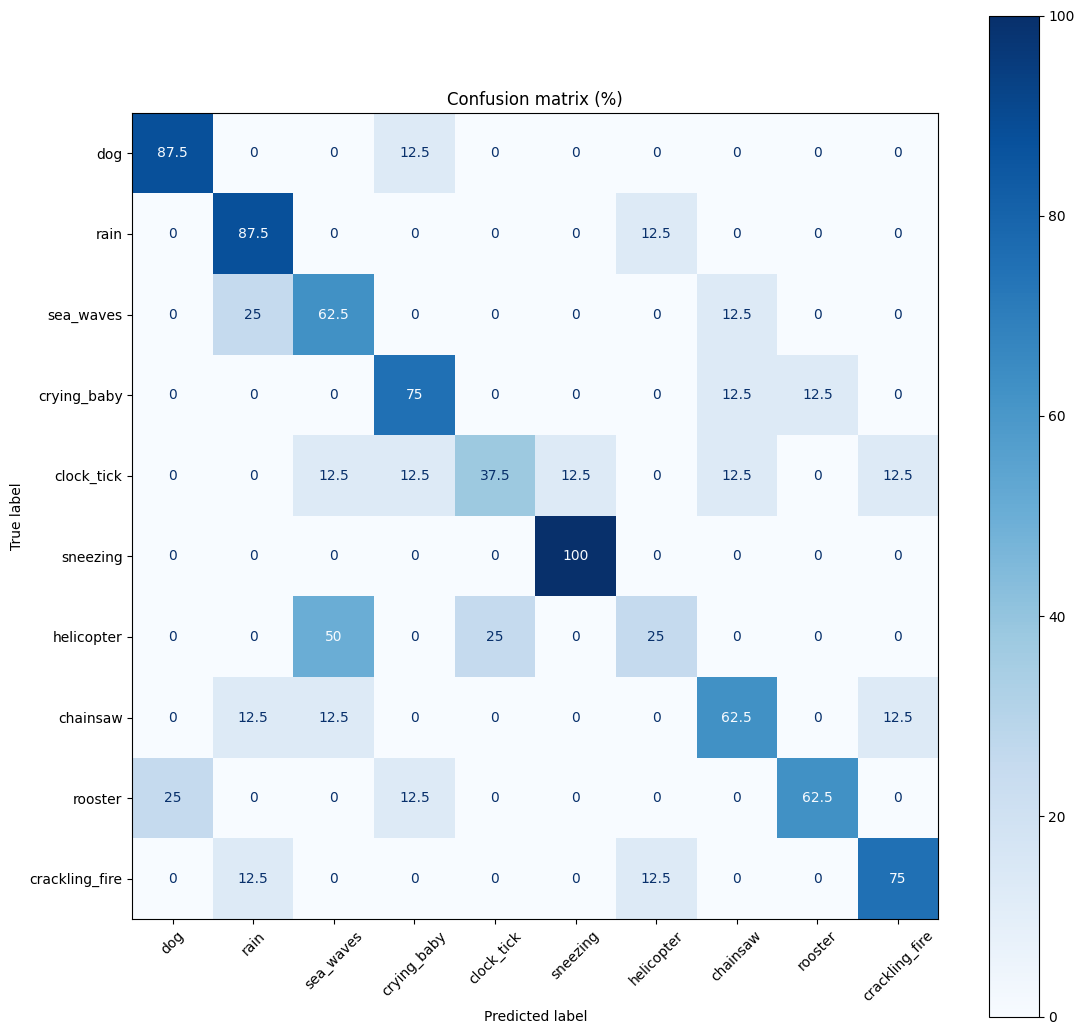

Fold 3/5

Training AE model...

Epoch 1/10
40/40 [==============================] - 41s 839ms/step - loss: 0.2053 - val_loss: 0.1526
Epoch 2/10
40/40 [==============================] - 32s 790ms/step - loss: 0.1465 - val_loss: 0.1281
Epoch 3/10
40/40 [==============================] - 32s 789ms/step - loss: 0.1298 - val_loss: 0.1205
Epoch 4/10
40/40 [==============================] - 32s 790ms/step - loss: 0.1173 - val_loss: 0.1140
Epoch 5/10
40/40 [==============================] - 32s 795ms/step - loss: 0.1128 - val_loss: 0.1075
Epoch 6/10
40/40 [==============================] - 32s 794ms/step - loss: 0.1062 - val_loss: 0.1029
Epoch 7/10
40/40 [==============================] - 32s 792ms/step - loss: 0.1051 - val_loss: 0.0994
Epoch 8/10
40/40 [==============================] - 32s 791ms/step - loss: 0.1031 - val_loss: 0.1007
Epoch 9/10
40/40 [==============================] - 31s 787ms/step - loss: 0.1035 - val_loss: 0.1047
Epoch 10/10
40/40 [==============================] - 32s 79

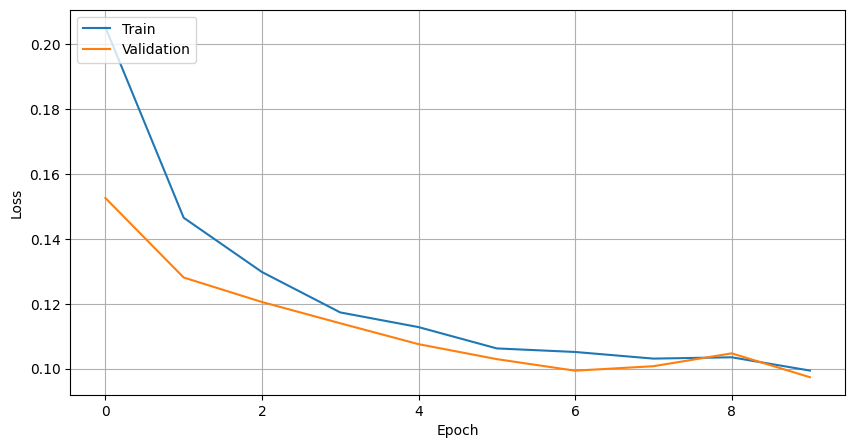

Classification training results:


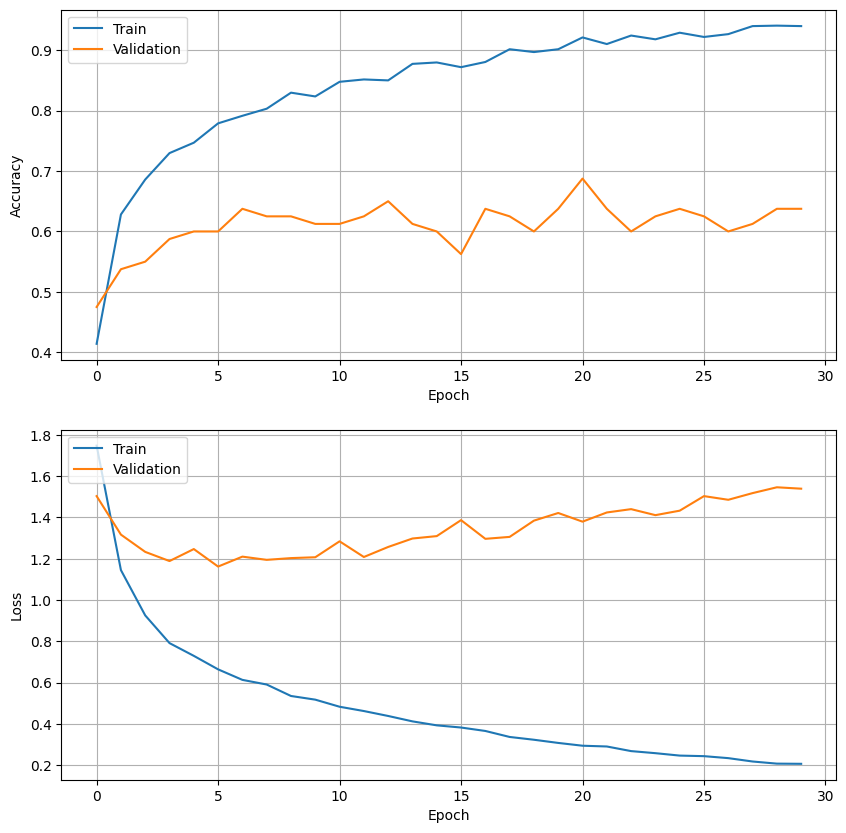

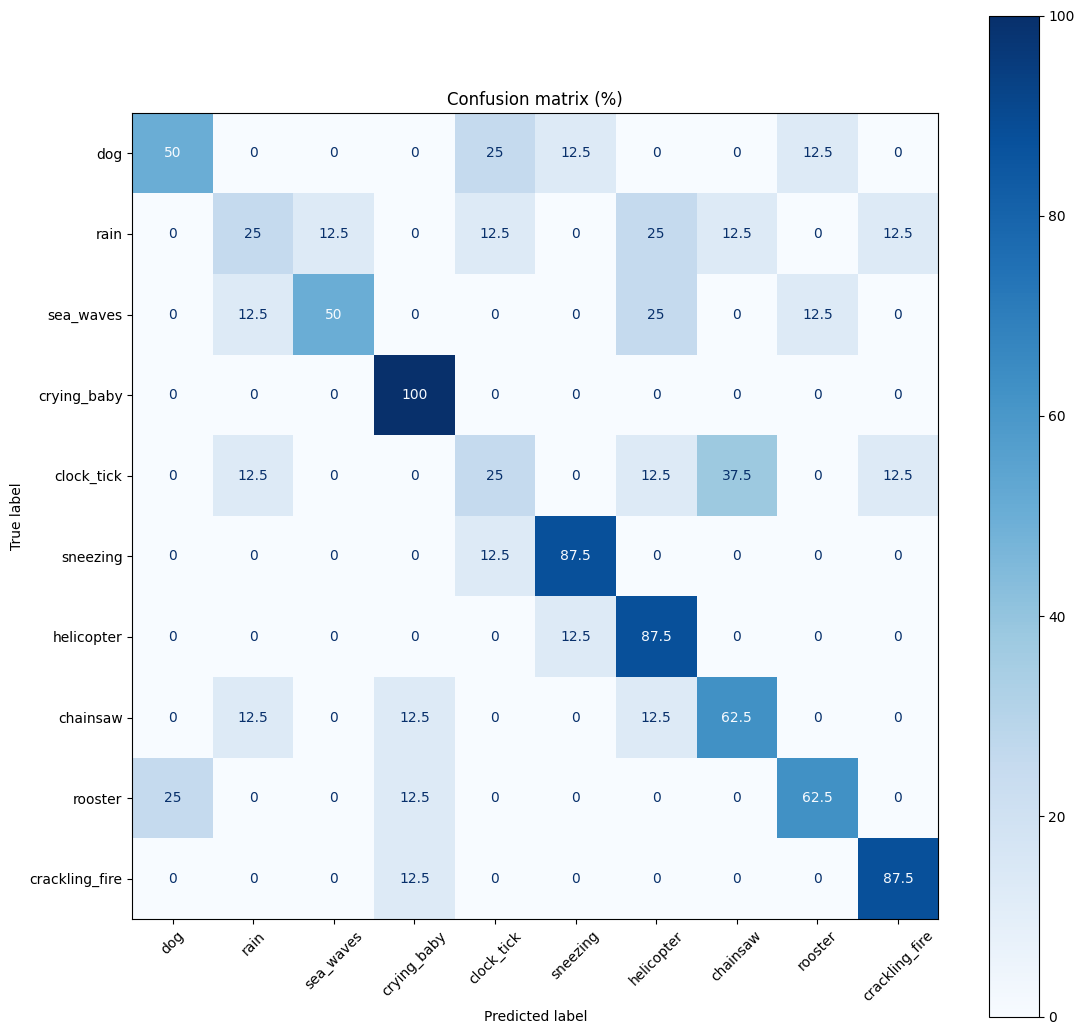

Fold 4/5

Training AE model...

Epoch 1/10
40/40 [==============================] - 41s 835ms/step - loss: 0.1942 - val_loss: 0.1743
Epoch 2/10
40/40 [==============================] - 32s 787ms/step - loss: 0.1450 - val_loss: 0.1385
Epoch 3/10
40/40 [==============================] - 32s 788ms/step - loss: 0.1270 - val_loss: 0.1289
Epoch 4/10
40/40 [==============================] - 31s 784ms/step - loss: 0.1213 - val_loss: 0.1417
Epoch 5/10
40/40 [==============================] - 31s 786ms/step - loss: 0.1178 - val_loss: 0.1095
Epoch 6/10
40/40 [==============================] - 31s 787ms/step - loss: 0.1066 - val_loss: 0.1097
Epoch 7/10
40/40 [==============================] - 32s 788ms/step - loss: 0.1117 - val_loss: 0.1059
Epoch 8/10
40/40 [==============================] - 31s 786ms/step - loss: 0.1005 - val_loss: 0.1058
Epoch 9/10
40/40 [==============================] - 31s 786ms/step - loss: 0.1102 - val_loss: 0.1009
Epoch 10/10
40/40 [==============================] - 31s 78

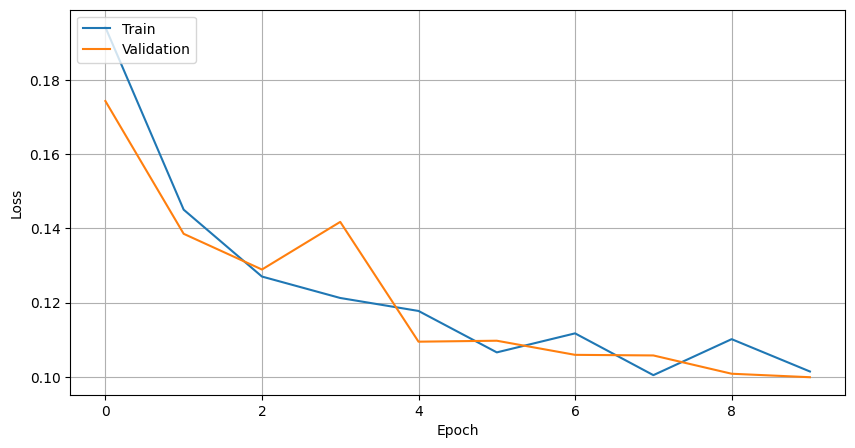

Classification training results:


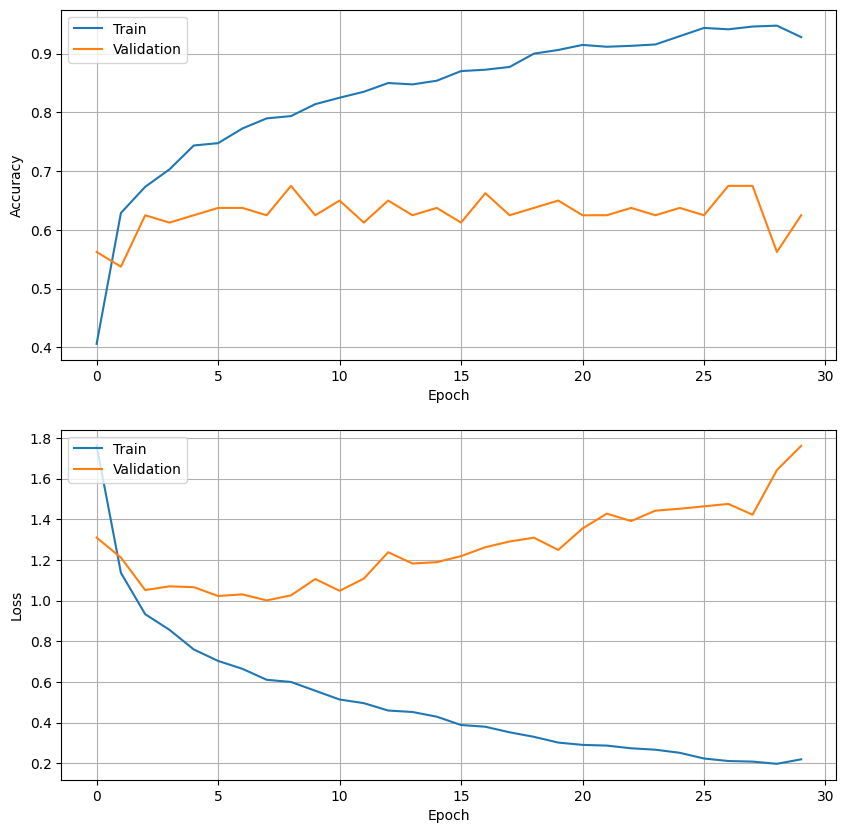

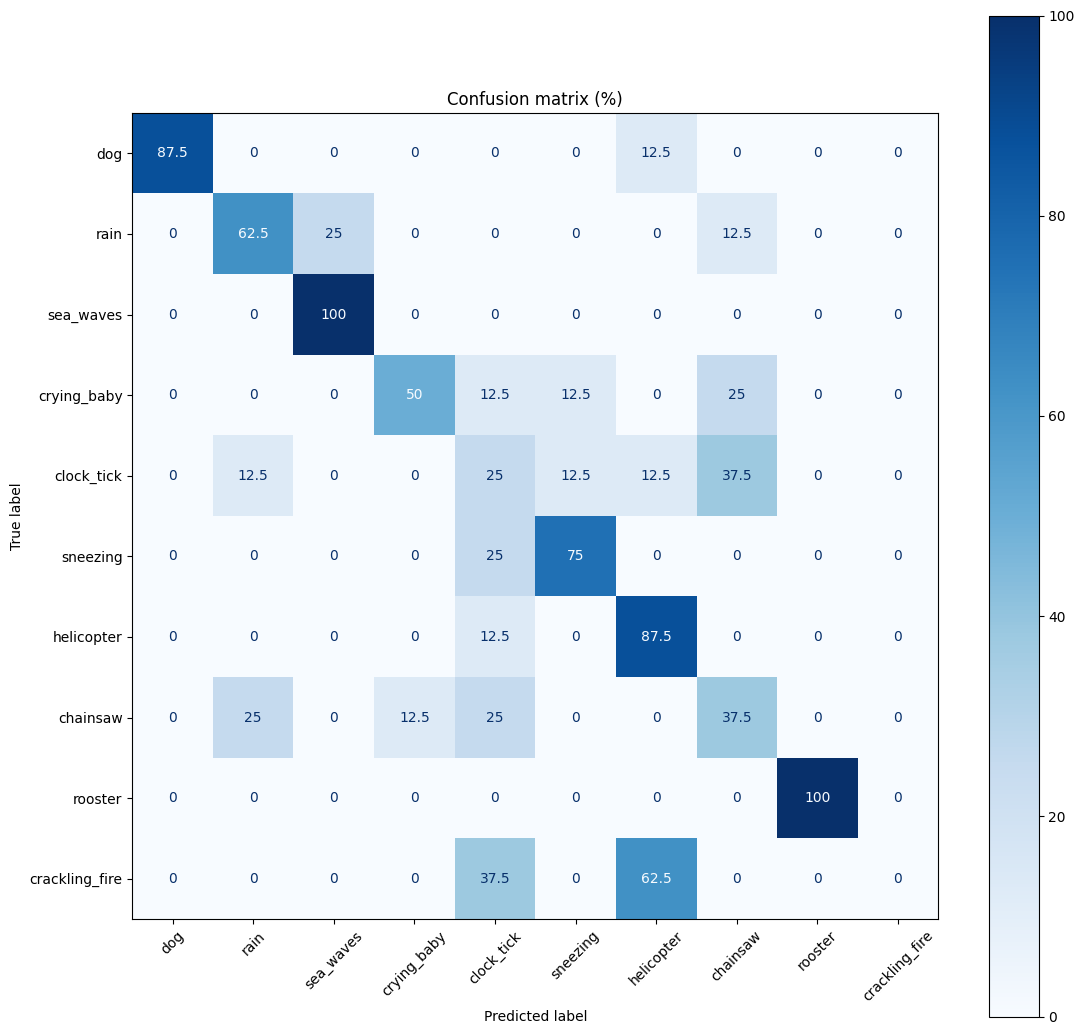

Fold 5/5

Training AE model...

Epoch 1/10
40/40 [==============================] - 41s 844ms/step - loss: 0.2028 - val_loss: 0.1536
Epoch 2/10
40/40 [==============================] - 31s 784ms/step - loss: 0.1452 - val_loss: 0.1317
Epoch 3/10
40/40 [==============================] - 31s 771ms/step - loss: 0.1311 - val_loss: 0.1208
Epoch 4/10
40/40 [==============================] - 31s 768ms/step - loss: 0.1218 - val_loss: 0.1111
Epoch 5/10
40/40 [==============================] - 31s 770ms/step - loss: 0.1135 - val_loss: 0.1116
Epoch 6/10
40/40 [==============================] - 31s 766ms/step - loss: 0.1103 - val_loss: 0.1050
Epoch 7/10
40/40 [==============================] - 31s 767ms/step - loss: 0.1056 - val_loss: 0.1054
Epoch 8/10
40/40 [==============================] - 31s 769ms/step - loss: 0.1009 - val_loss: 0.1016
Epoch 9/10
40/40 [==============================] - 31s 772ms/step - loss: 0.1014 - val_loss: 0.0983
Epoch 10/10
40/40 [==============================] - 31s 77

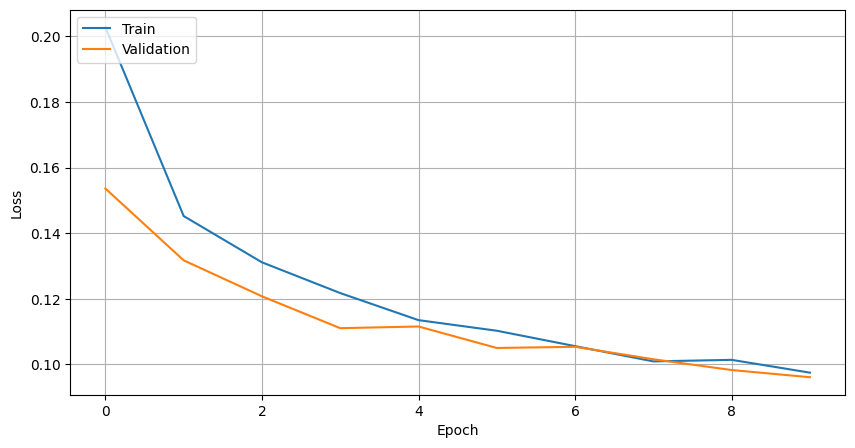

Classification training results:


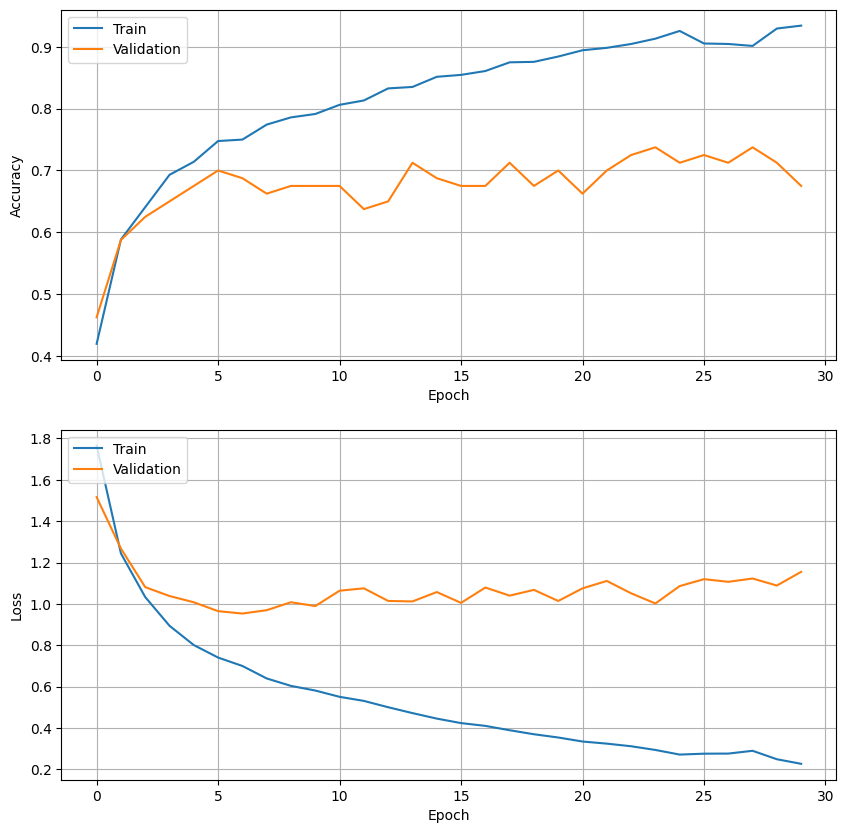

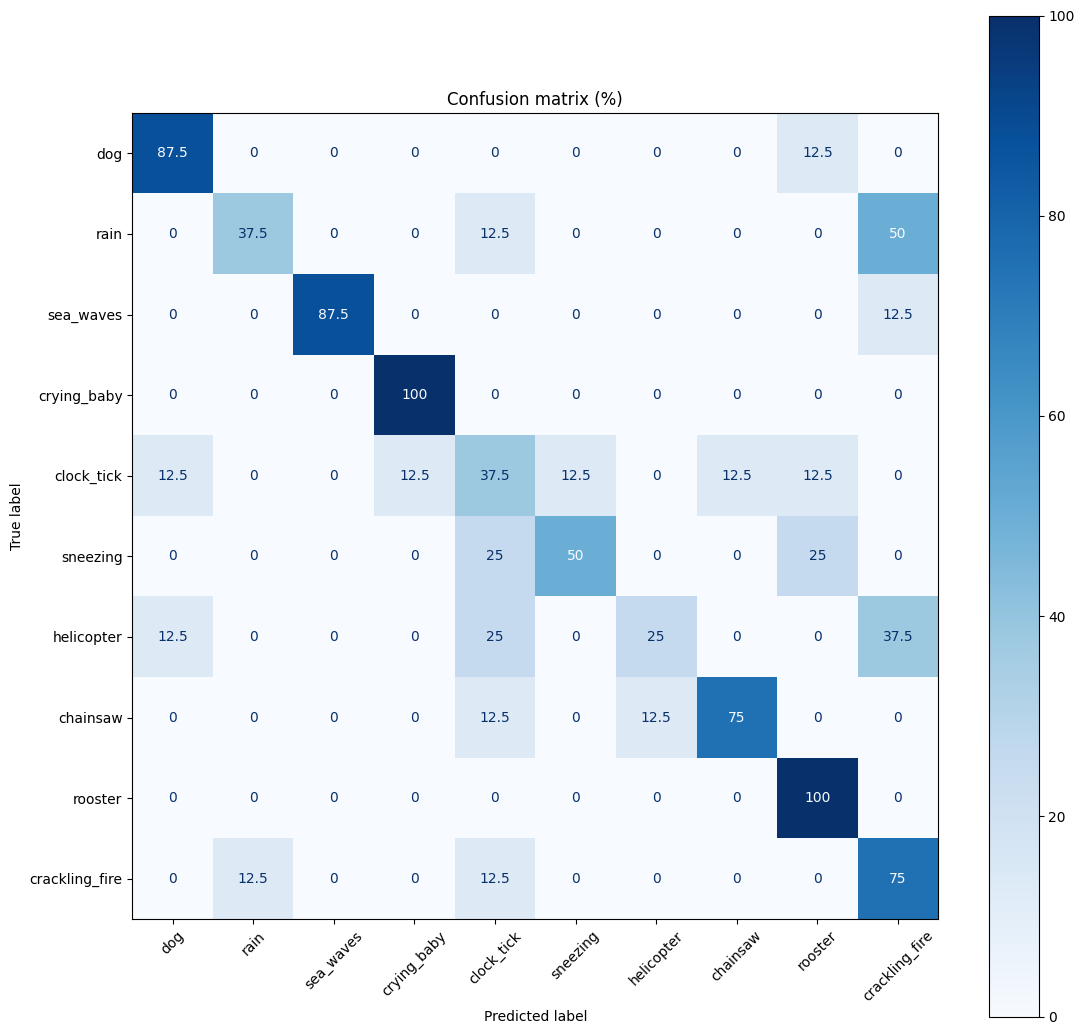

Average results:

AE training results:
Average training loss: 0.099 ± 0.001
Average validation loss: 0.095 ± 0.004

Classification training results:
Average training accuracy: 0.93 ± 0.01
Average validation accuracy: 0.65 ± 0.02
Average training loss: 0.23 ± 0.02
Average validation loss: 1.33 ± 0.30

Average (total) training time: 503.07 ± 7.07 s

Plotting average results:

AE training result plots:


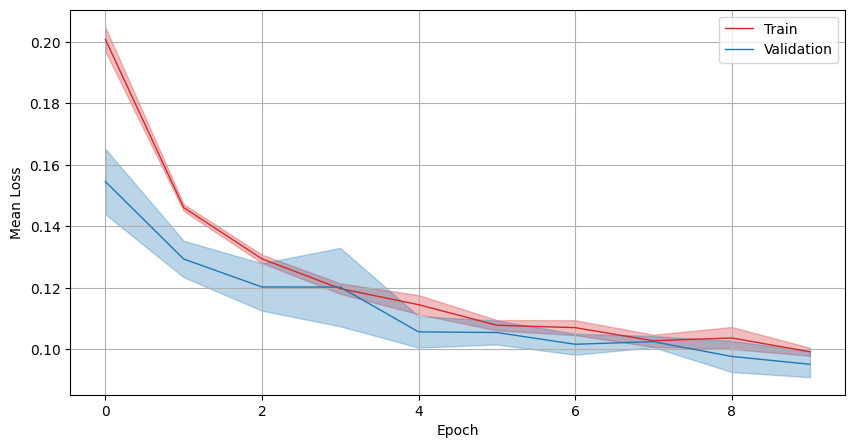

Classification training result plots:


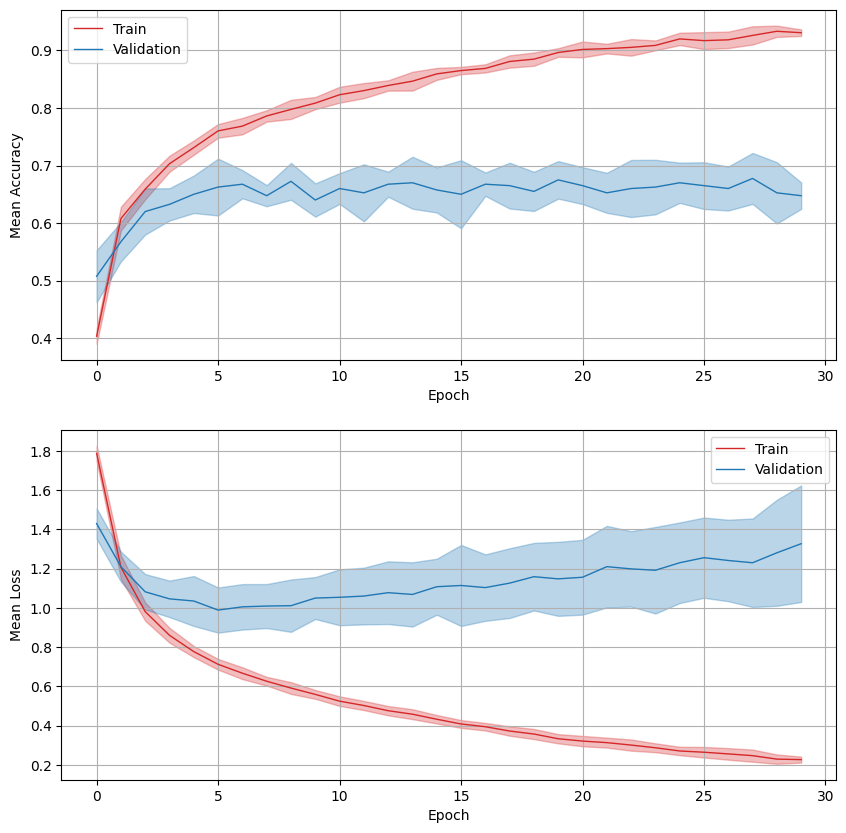

Average confusion matrix:



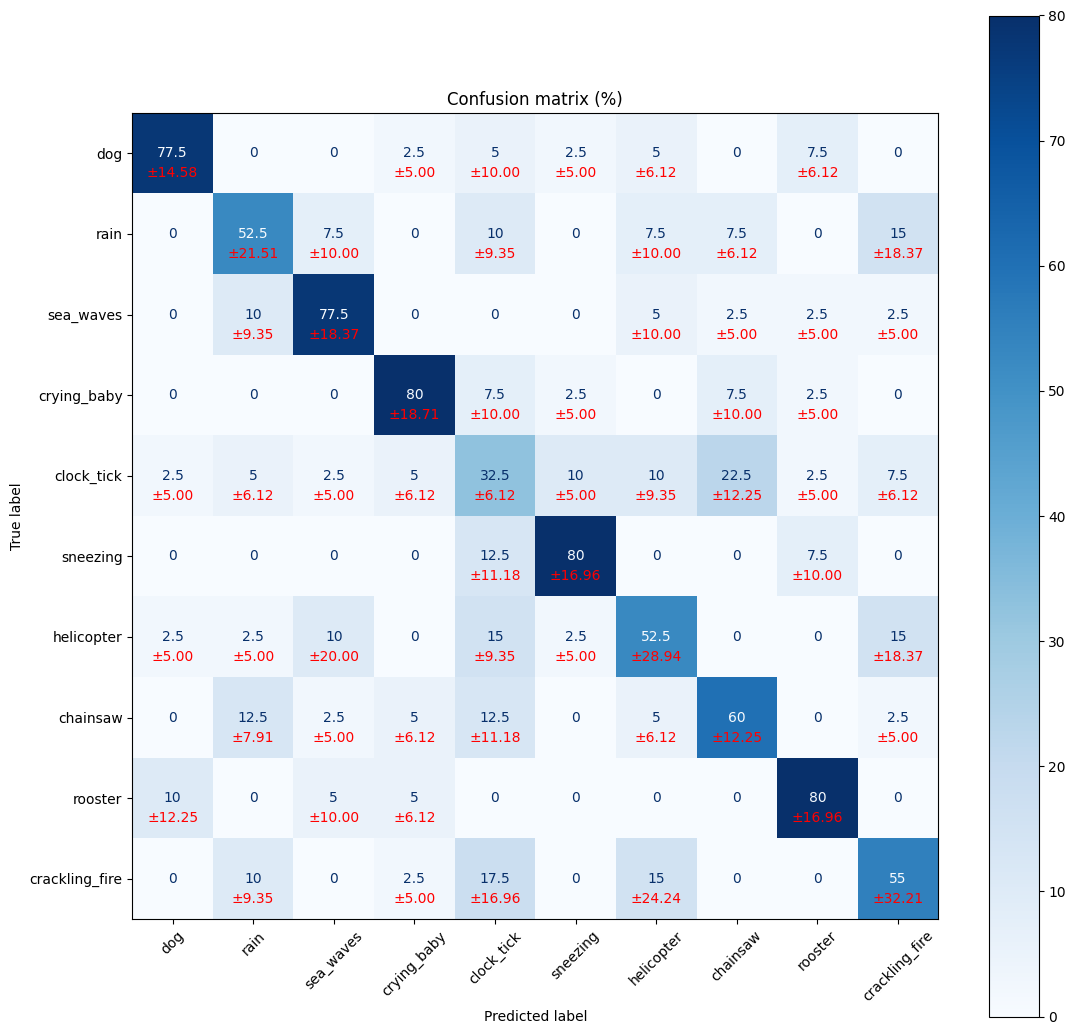

In [5]:
hist = cross_validation(df, 
                        init_model, 
                        X_dim=(128, 156), 
                        n_folds=5, 
                        epochs=30, 
                        num_batch_size=32, 
                        verbose=1, 
                        transpose=True, 
                        init_AE = init_autoencoder, 
                        enc_layer = 2,
                        num_epochs_AE=10)

# NB! The function cross_validation is valid also for models without autoencoder. In this case, just ignore the last 3 arguments. (init_AE, enc_layer, num_epochs_AE)